# Lab10- K Mean Clustering 
Mirul Patel (N01489347)

## Import Libraries



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [13]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

## Get the Data(Wine dataset)



In [17]:
wine = datasets.load_wine()

In [18]:
X = scale(wine.data)
y = pd.DataFrame(wine.target)
variable_names = wine.feature_names
X[0:10]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401],
       [ 1.48155459, -0.517366

In [19]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [21]:
variable_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Apply Kmean Clustering



In [20]:
cluster = KMeans(n_clusters=3, random_state=5)

cluster.fit(X)

KMeans(n_clusters=3, random_state=5)

In [92]:
wine_df = pd.DataFrame(wine.data)
wine_df.columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

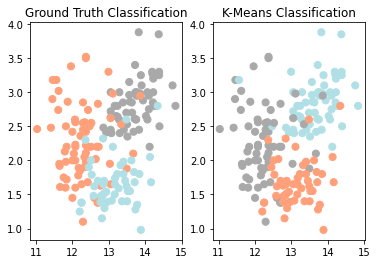

In [111]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=wine_df.alcohol, y=wine_df.total_phenols, c=color_theme[wine.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=wine_df.alcohol, y=wine_df.total_phenols, c=color_theme[cluster.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

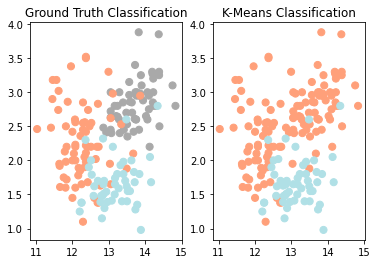

In [112]:
relabel = np.choose(cluster.labels_, [1, 2, 1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=wine_df.alcohol, y=wine_df.total_phenols, c=color_theme[wine.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=wine_df.alcohol, y=wine_df.total_phenols, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

## Predictions and Evaluations



In [113]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.54      0.96      0.69        71
           2       0.94      1.00      0.97        48

    accuracy                           0.65       178
   macro avg       0.49      0.65      0.55       178
weighted avg       0.47      0.65      0.54       178



C:\Users\mirul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mirul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
